# Определение тарифа для телеком компании

Компания «Мегалайн» — федеральный оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». 

**Цель исследования:** определить какой тариф приносит больше денег, чтобы скорректировать рекламный бюджет

**Ход исследования:**
1. Подготовка данных 
1. Анализ данных: 
    1. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц
    1. Среднее количество, дисперсия и стандартное отклонение. Описание распределения
1. Проверка гипотез 
    1. средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
    1. средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

## Изучение данных из файлов

In [1]:
#Импортируем библиотеки
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
from datetime import datetime 
import math
import numpy as np
from math import factorial
from scipy import stats as st

In [2]:
#Читаем данные из файла
try:
    calls_data = pd.read_csv('calls.csv')
except:
    calls_data = pd.read_csv('datasets/calls.csv')

#Выводим содержимое и общую информацию
display(calls_data.head(10)) 
calls_data.info()

#Проверяем наличие явных дубликатов
if calls_data.duplicated().sum() > 0:
    print('Найдено дубликатов:', calls_data.duplicated().sum())
else:
    print('Явных дубликатов не обнаружено')

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
Явных дубликатов не обнаружено


- Пропусков нет
- Дубликатов нет
- Поле `call_date` необходимо привести к типу date
- Значения в поле `duration` необходимо окгруглить в большую сторону

In [3]:
#Читаем данные из файла
try:
    internet_data = pd.read_csv('internet.csv')
except:
    internet_data = pd.read_csv('datasets/internet.csv')

#Выводим содержимое и общую информацию
display(internet_data.head(10)) 
internet_data.info()

#Проверяем наличие явных дубликатов
if internet_data.duplicated().sum() > 0:
    print('Найдено дубликатов:', internet_data.duplicated().sum())
else:
    print('Явных дубликатов не обнаружено')

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
Явных дубликатов не обнаружено


- Пропусков нет
- Дубликатов нет
- Поле `session_date` необходимо привести к типу date

In [4]:
#читаем данные из файла
try:
    messages_data = pd.read_csv('messages.csv')
except:
    messages_data = pd.read_csv('datasets/messages.csv')

#выводим содержимое и общую информацию
display(messages_data.head(10)) 
messages_data.info()

#проверяем наличие явных дубликатов
if messages_data.duplicated().sum() > 0:
    print('Найдено дубликатов:', messages_data.duplicated().sum())
else:
    print('Явных дубликатов не обнаружено')   

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
Явных дубликатов не обнаружено


- Пропусков нет
- Дубликатов нет
- Поле `message_date` необходимо привести к типу date

In [5]:
#читаем данные из файла
try:
    tariffs_data = pd.read_csv('tariffs.csv')
except:
    tariffs_data = pd.read_csv('datasets/tariffs.csv')

#выводим содержимое и общую информацию
display(tariffs_data.head(10)) 
tariffs_data.info()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


- Пропусков нет 
- Дубликатов нет
- Приведение типов не требуется

In [6]:
#читаем данные из файла
try:
    users_data = pd.read_csv('users.csv')
except:
    users_data = pd.read_csv('datasets/users.csv')

#выводим содержимое и общую информацию
display(users_data.head(10)) 
users_data.info()

#проверяем наличие явных дубликатов
if users_data.duplicated().sum() > 0:
    print('Найдено дубликатов:', users_data.duplicated().sum())
else:
    print('Явных дубликатов не обнаружено')  

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
Явных дубликатов не обнаружено


- Есть пропуски в столбце `churn_date`. Но это не является ошибкой, так как пропуск в данном столбец означает, что тариф ещё действовал на момент выгрузки данных
- Дубликатов нет 
- Поля `churn_date` и `reg_date` необходимо привести к типу date

## Подготовка данных

### Приведение типов

Для выполнения операций с датами необходимо привести столбцы `call_date`, `session_date`, `message_date`, `reg_date`, `churn_date` к типу datetime.

In [7]:
#приведем типы для столбцов с датами 
DATE_FORMAT = '%Y-%m-%d'
calls_data['call_date'] = pd.to_datetime(calls_data['call_date'],format= DATE_FORMAT)
internet_data['session_date'] = pd.to_datetime(internet_data['session_date'],format= DATE_FORMAT)
messages_data['message_date'] = pd.to_datetime(messages_data['message_date'],format= DATE_FORMAT)
users_data['reg_date'] = pd.to_datetime(users_data['reg_date'],format= DATE_FORMAT)
users_data['churn_date'] = pd.to_datetime(users_data['churn_date'],format= DATE_FORMAT)

### Исправление ошибок

В описании особенностей работы Мегалайн указано, что каждый звонок округляется до минуты. Округлим в большую сторону столбец `duration` в датафрейме `calls_data`

In [8]:
#Округлим минуты звонков в большую сторону в датафрейме calls_data 
calls_data['duration'] = calls_data['duration'].apply(np.ceil)

In [9]:
#Приведем тип данных в столбце duration к типу int
calls_data['duration'] = calls_data['duration'].astype(int)

Проверим какая длительность звонков встречается

In [10]:
print(calls_data['duration'].value_counts())

0     39613
7     11510
6     11457
5     11411
8     11272
9     10973
4     10918
3     10362
10    10186
11     9385
2      9194
12     8448
1      8402
13     7486
14     6554
15     5505
16     4551
17     3671
18     2984
19     2411
20     1806
21     1304
22      975
23      720
24      468
25      363
26      257
27      151
28      104
29       56
30       39
31       30
32       17
33       10
35        5
34        3
37        2
36        2
38        2
Name: duration, dtype: int64


Самая популярная длительность - 0 минут. Но это не ошибка, это пропущенные звонки. 

### Подсчет данных для пользователя

Для подсчета данных по меясцам добавим в каждый датафрейм с услугами (звонки, смс, интернет) столбец `month`. В нем будет храниться порядковый номер месяца

In [11]:
#Добавляем столбец с номером месяца в датафреймы с услугами
calls_data['month']= pd.DatetimeIndex(calls_data['call_date']).month
internet_data['month']= pd.DatetimeIndex(internet_data['session_date']).month
messages_data['month']= pd.DatetimeIndex(messages_data['message_date']).month

#### Количество сделанных звонков и израсходованных минут разговора по месяцам

In [12]:
#Создаем сводную таблицу с данными о звонках
user_calls = (calls_data.pivot_table(index=['user_id', 'month'], 
values='duration', aggfunc=['sum', 'count']))
#Переименовываем колонки
user_calls.columns = ['calls_duration', 'calls_count']
#Проверяем результат
display(user_calls.head())

calls_duration  calls_count
user_id month                             
1000    5                 159           22
        6                 172           43
        7                 340           47
        8                 408           52
        9                 466           58

#### Количество отправленных сообщений по месяцам

In [13]:
#Создаем сводную таблицу с данными о сообщениях
user_messages = messages_data.pivot_table(index=['user_id', 'month'], values='id', aggfunc= 'count')
#Переименовываем колонки
user_messages.columns = ['message_count']
#Проверяем результат
display(user_messages.head())


message_count
user_id month               
1000    5                 22
        6                 60
        7                 75
        8                 81
        9                 57

#### Объем израсходованного интернет-трафика по месяцам

In [14]:
#Создаем сводную таблицу с данными об интернет-трафике
user_internet = internet_data.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc= 'sum')
#Добавляем столбец с расходами в гигабайтах
user_internet['gb_used'] = (user_internet['mb_used']/ 1024).apply(np.ceil)
#Проверяем результат
display(user_internet.head())


mb_used  gb_used
user_id month                   
1000    5       2253.49      3.0
        6      23233.77     23.0
        7      14003.64     14.0
        8      14055.93     14.0
        9      14568.91     15.0

In [15]:
#Приведем тип данных в столбце gb_used к типу int
user_internet['gb_used'] = user_internet['gb_used'].astype(int)

#### Помесячная выручка

In [16]:
#Объединяем таблицы в одну
user_services = user_calls.merge(user_messages, on=['user_id', 'month'], how='outer')
user_services = user_services.merge(user_internet, on=['user_id', 'month'], how='outer').reset_index()
#Проверяем результат
user_services.info()
display(user_services.head(100))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         3214 non-null   int64  
 1   month           3214 non-null   int64  
 2   calls_duration  3174 non-null   float64
 3   calls_count     3174 non-null   float64
 4   message_count   2717 non-null   float64
 5   mb_used         3203 non-null   float64
 6   gb_used         3203 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 175.9 KB


,user_id,month,calls_duration,calls_count,message_count,mb_used,gb_used
0,1000,5,159.0,22.0,22.0,2253.49,3.0
1,1000,6,172.0,43.0,60.0,23233.77,23.0
2,1000,7,340.0,47.0,75.0,14003.64,14.0
3,1000,8,408.0,52.0,81.0,14055.93,14.0
4,1000,9,466.0,58.0,57.0,14568.91,15.0
...,...,...,...,...,...,...,...
95,1012,10,451.0,48.0,13.0,29071.87,29.0
96,1012,11,206.0,25.0,25.0,22517.95,22.0
97,1012,12,356.0,43.0,15.0,14005.84,14.0
98,1013,11,369.0,52.0,17.0,9780.03,10.0


In [17]:
user_services['user_id'].nunique()

498

In [18]:
#Заполним пропуски нулями 
user_services = user_services.fillna(0)

Добавим тариф пользователя в таблицу `user_services`

In [19]:
#Напишем функцию, которая принимает строку и возвращает тариф 
def get_user_tariff (row): 
    user_id = row['user_id']
    tariff = users_data.query('user_id == @user_id')['tariff'].values[0]
    return tariff
    
#Вызываем функцию 
user_services['tariff'] = user_services.apply(get_user_tariff, axis=1)

#Проверяем результат
display(user_services)

,user_id,month,calls_duration,calls_count,message_count,mb_used,gb_used,tariff
0,1000,5,159.0,22.0,22.0,2253.49,3.0,ultra
1,1000,6,172.0,43.0,60.0,23233.77,23.0,ultra
2,1000,7,340.0,47.0,75.0,14003.64,14.0,ultra
3,1000,8,408.0,52.0,81.0,14055.93,14.0,ultra
4,1000,9,466.0,58.0,57.0,14568.91,15.0,ultra
...,...,...,...,...,...,...,...,...
3209,1489,9,0.0,0.0,32.0,17206.30,17.0,smart
3210,1489,10,0.0,0.0,21.0,19559.44,20.0,smart
3211,1489,11,0.0,0.0,20.0,17491.56,18.0,smart
3212,1489,12,0.0,0.0,35.0,17322.51,17.0,smart


In [20]:
#Напишем функцию, которая принимает строку и возвращает доход за месяц
def get_monthly_income(row):
    #Получаем id пользователя
    user_id = row['user_id']
    
    #Получаем тариф пользователя
    tariff = row['tariff']

    #Вычисляем выручку со звонков
    minutes = row['calls_duration'] - tariffs_data.query('tariff_name == @tariff')['minutes_included'].values[0]
    if minutes < 0: minutes = 0
    minutes = minutes * tariffs_data.query('tariff_name == @tariff')['rub_per_minute'].values[0]

        
    #Вычисляем выручку с сообщений    
    messages = row['message_count'] - tariffs_data.query('tariff_name == @tariff')['messages_included'].values[0]
    if messages < 0: messages = 0      
    messages = messages * tariffs_data.query('tariff_name == @tariff')['rub_per_message'].values[0]
     
    #Вычисляем выручку за интернет    
    mb =  row['mb_used'] - tariffs_data.query('tariff_name == @tariff')['mb_per_month_included'].values[0]
    if mb < 0: mb = 0   
    gb = math.ceil(mb / 1024)
    gb = gb * tariffs_data.query('tariff_name == @tariff')['rub_per_gb'].values[0]
    
    #Вычисляем общую выручку с учетом абонентской платы
    total = minutes + messages + gb + tariffs_data.query('tariff_name == @tariff')['rub_monthly_fee'].values[0]
    return total

#Вызываем функцию
user_services['monthly_income'] = user_services.apply(get_monthly_income, axis=1)

#Проверяем результат
display(user_services)


,user_id,month,calls_duration,calls_count,message_count,mb_used,gb_used,tariff,monthly_income
0,1000,5,159.0,22.0,22.0,2253.49,3.0,ultra,1950.0
1,1000,6,172.0,43.0,60.0,23233.77,23.0,ultra,1950.0
2,1000,7,340.0,47.0,75.0,14003.64,14.0,ultra,1950.0
3,1000,8,408.0,52.0,81.0,14055.93,14.0,ultra,1950.0
4,1000,9,466.0,58.0,57.0,14568.91,15.0,ultra,1950.0
...,...,...,...,...,...,...,...,...,...
3209,1489,9,0.0,0.0,32.0,17206.30,17.0,smart,950.0
3210,1489,10,0.0,0.0,21.0,19559.44,20.0,smart,1550.0
3211,1489,11,0.0,0.0,20.0,17491.56,18.0,smart,1150.0
3212,1489,12,0.0,0.0,35.0,17322.51,17.0,smart,950.0


## Анализ данных

Разделим таблицу на 2 таблицы по тарифам 

In [21]:
#Данные по тарифу ultra
ultra = user_services.query('tariff == "ultra"')
#Данные по тарифу smart
smart = user_services.query('tariff == "smart"')

### Тариф Ultra

Рассчитаем общее и среднее количество израсходованных услуг для тарифа ultra

In [22]:
#Вычисляем сколько минут разговора, сообщений и какой объём интернет-трафика требуется пользователям в месяц
ultra_stat = ultra.pivot_table(index='month',
values=['calls_duration', 'message_count', 'gb_used', 'monthly_income'], 
aggfunc=['sum', 'mean']) 
ultra_stat.columns = (['calls_duration', 'message_count', 'gb_used', 'monthly_income',
                     'mean_calls_duration', 'mean_message_count', 'mean_gb_used', 'mean_monthly_income'])
#Проверим результат
display(ultra_stat)

,calls_duration,message_count,gb_used,monthly_income,mean_calls_duration,mean_message_count,mean_gb_used,mean_monthly_income
month,,,,,,,,
1,3853.0,119.0,304.0,17550.0,428.111111,13.222222,33.777778,1950.000000
2,7131.0,288.0,527.0,47400.0,297.125000,12.000000,21.958333,1975.000000
3,18117.0,653.0,1195.0,74550.0,489.648649,17.648649,32.297297,2014.864865
4,25191.0,933.0,1736.0,110100.0,458.018182,16.963636,31.563636,2001.818182
5,34192.0,1298.0,2536.0,138000.0,510.328358,19.373134,37.850746,2059.701493
6,40295.0,1591.0,3505.0,171300.0,479.702381,18.940476,41.726190,2039.285714
7,49667.0,1866.0,4536.0,192750.0,545.791209,20.505495,49.846154,2118.131868
8,54653.0,2097.0,5183.0,222900.0,510.775701,19.598131,48.439252,2083.177570
9,62036.0,2213.0,6013.0,232800.0,539.443478,19.243478,52.286957,2024.347826


Рассчитаем среднее количесиво, дисперсию и стандартное отклонение

In [23]:
print('Минуты разговора')
print('Среднее количество:',ultra['calls_duration'].mean() )
print('Дисперсия:',np.var(ultra['calls_duration']) )
print('Стандартное отклонение:',np.std(ultra['calls_duration']) )
print()

print('Сообщения')
print('Среднее количество:',ultra['message_count'].mean() )
print('Дисперсия:',np.var(ultra['message_count']) )
print('Стандартное отклонение:',np.std(ultra['message_count']) )
print()

print('Интернет-трафик (ГБ)')
print('Среднее количество:',ultra['gb_used'].mean() )
print('Дисперсия:',np.var(ultra['gb_used']) )
print('Стандартное отклонение:',np.std(ultra['gb_used']) )
print()

print('Выручка')
print('Среднее количество:',ultra['monthly_income'].mean() )
print('Дисперсия:',np.var(ultra['monthly_income']) )
print('Стандартное отклонение:',np.std(ultra['monthly_income']) )

Минуты разговора
Среднее количество: 526.6233502538071
Дисперсия: 100771.22361720211
Стандартное отклонение: 317.444835549741

Сообщения
Среднее количество: 49.36345177664975
Дисперсия: 2282.94607539489
Стандартное отклонение: 47.78018496610169

Интернет-трафик (ГБ)
Среднее количество: 19.494416243654822
Дисперсия: 96.99311602978705
Стандартное отклонение: 9.8485083149575

Выручка
Среднее количество: 2070.1522842639592
Дисперсия: 141373.07325620213
Стандартное отклонение: 375.99610803331746


### Тариф Smart

Рассчитаем общее и среднее количество израсходованных услуг для тарифа smart

In [24]:
#Вычисляем сколько минут разговора, сообщений и какой объём интернет-трафика требуется пользователям в месяц
smart_stat = smart.pivot_table(index='month',
values=['calls_duration', 'message_count', 'gb_used', 'monthly_income'], 
aggfunc=['sum', 'mean']) 
smart_stat.columns = (['calls_duration', 'message_count', 'gb_used', 'monthly_income', 
                      'mean_calls_duration', 'mean_message_count', 'mean_gb_used', 'mean_monthly_income'])
#Проверим результат
display(smart_stat)

,calls_duration,message_count,gb_used,monthly_income,mean_calls_duration,mean_message_count,mean_gb_used,mean_monthly_income
month,,,,,,,,
1,6931.0,297.0,620.0,24525.0,203.852941,8.735294,18.235294,721.323529
2,17324.0,687.0,1397.0,48001.0,298.689655,11.844828,24.086207,827.603448
3,30034.0,1173.0,2453.0,89676.0,390.051948,15.233766,31.857143,1164.623377
4,41119.0,1526.0,3443.0,107866.0,367.133929,13.625000,30.741071,963.089286
5,54618.0,2243.0,4762.0,168849.0,387.361702,15.907801,33.773050,1197.510638
6,64885.0,2616.0,5478.0,197459.0,395.640244,15.951220,33.402439,1204.018293
7,82079.0,3191.0,6784.0,246014.0,408.353234,15.875622,33.751244,1223.950249
8,99045.0,3933.0,7905.0,310340.0,421.468085,16.736170,33.638298,1320.595745
9,111439.0,4262.0,8746.0,324986.0,428.611538,16.392308,33.638462,1249.946154


Рассчитаем среднее количесиво, дисперсию и стандартное отклонение

In [25]:
print('Минуты разговора')
print('Среднее количество:',smart['calls_duration'].mean() )
print('Дисперсия:',np.var(smart['calls_duration']) )
print('Стандартное отклонение:',np.std(smart['calls_duration']) )
print()

print('Сообщения')
print('Среднее количество:',smart['message_count'].mean() )
print('Дисперсия:',np.var(smart['message_count']) )
print('Стандартное отклонение:',np.std(smart['message_count']) )
print()

print('Интернет-трафик (ГБ)')
print('Среднее количество:',smart['gb_used'].mean() )
print('Дисперсия:',np.var(smart['gb_used']) )
print('Стандартное отклонение:',np.std(smart['gb_used']) )
print()

print('Выручка')
print('Среднее количество:',smart['monthly_income'].mean() )
print('Дисперсия:',np.var(smart['monthly_income']) )
print('Стандартное отклонение:',np.std(smart['monthly_income']) )

Минуты разговора
Среднее количество: 417.9349484073576
Дисперсия: 36203.06665209465
Стандартное отклонение: 190.27103471651864

Сообщения
Среднее количество: 33.384028712427096
Дисперсия: 796.455482917076
Стандартное отклонение: 28.221542886898938

Интернет-трафик (ГБ)
Среднее количество: 16.328847016599372
Дисперсия: 33.01388745483741
Стандартное отклонение: 5.7457712671874965

Выручка
Среднее количество: 1289.9735307312696
Дисперсия: 669485.2209234155
Стандартное отклонение: 818.2207653948997


### Визуализации

#### Минуты разговора

Text(0, 0.5, 'Частота')

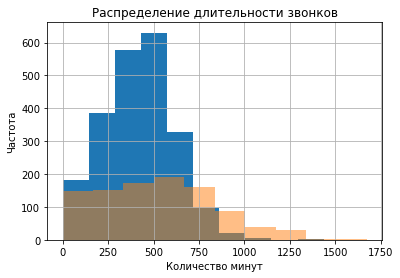

In [26]:
#Чтобы отобразить распределения для обоих тарифов на одном графике, добавим данные по тарифу smart
ax = smart['calls_duration'].plot(kind='hist', label='smart')
#Построим гистограмму по тарифу ultra
ultra['calls_duration'].plot(kind='hist', label='ultra', ax=ax, grid=True, alpha=0.5)
plt.title('Распределение длительности звонков')
plt.xlabel('Количество минут')
plt.ylabel('Частота')

#### Сообщения

Text(0, 0.5, 'Частота')

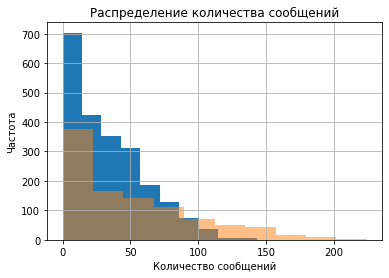

In [27]:
#Чтобы отобразить распределения для обоих тарифов на одном графике, добавим данные по тарифу smart
ax = smart['message_count'].plot(kind='hist', label='smart')
#Построим гистограмму по тарифу ultra
ultra['message_count'].plot(kind='hist', label='ultra', ax=ax, grid=True, alpha=0.5)
plt.title('Распределение количества сообщений')
plt.xlabel('Количество сообщений')
plt.ylabel('Частота')

#### Интернет-трафик

Text(0, 0.5, 'Частота')

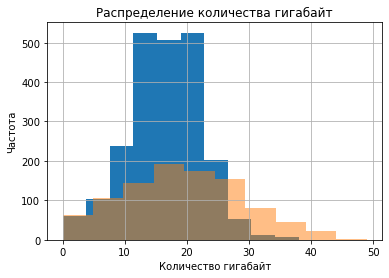

In [28]:
#Чтобы отобразить распределения для обоих тарифов на одном графике, добавим данные по тарифу smart
ax = smart['gb_used'].plot(kind='hist', label='smart')
#Построим гистограмму по тарифу ultra
ultra['gb_used'].plot(kind='hist', label='ultra', ax=ax, grid=True, alpha=0.5)
plt.title('Распределение количества гигабайт')
plt.xlabel('Количество гигабайт')
plt.ylabel('Частота')

#### Выручка

Text(0, 0.5, 'Частота')

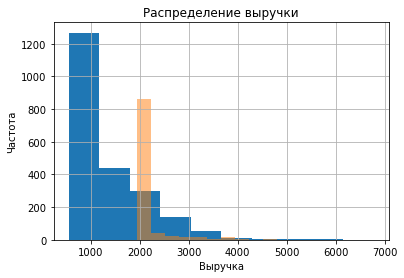

In [29]:
#Чтобы отобразить распределения для обоих тарифов на одном графике, добавим данные по тарифу smart
ax = smart['monthly_income'].plot(kind='hist', label='smart')
#Построим гистограмму по тарифу ultra
ultra['monthly_income'].plot(kind='hist', label='ultra', ax=ax, grid=True, alpha=0.5)
plt.title('Распределение выручки')
plt.xlabel('Выручка')
plt.ylabel('Частота')

#### Вывод

По гистограммам можно видеть, что распределения не соответствуют нормальному. Среднее количество использования всех видов услуг в тарифе ultra превышает тариф smart. При этом выручка от пользователей тарифа ultra так же превышает выручку тарифа smart.

## Проверка гипотез

Для проверки гипотез будем использовать критерий Стьюдента, так как он не требует нормального распределения выборок, а по гистрограммам выше видно, что распределения не похохи на нормальные.  

Будем использовать метод `ttest_ind` так как в обоих случаях выборки независимые.

### Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Сформулируем гипотезы:  
**H0:**  Cредняя выручка пользователей тарифов «Ультра» и «Смарт» не отличаются  
**H1:** Cредняя выручка пользователей тарифов «Ультра» и «Смарт» отличаются

In [30]:
#Зададим пороговое значение
alpha = .05

In [31]:
#Выполняем t-тест. В качестве аргументов возьмем помесячную выручку пользователей каждого тарифа
results = st.ttest_ind(
    ultra['monthly_income'], 
    smart['monthly_income'], 
    equal_var=False)

#Выводим pvalue
print('pvalue:', results.pvalue)

#Проверяем 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу ") 

pvalue: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


Вероятность получить равное значение почти равна 0, сл-но нулевую гипотезу можно отвергнуть, а альтернативную подтвердить.
**Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются**

### Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

**H0:** Cредняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов¶  
**H1:** Cредняя выручка пользователей из Москвы других регионов отличаются¶

In [32]:
#Зададим пороговое значение
alpha = .05

Добавим в таблицу `user_services` город пользователя

In [33]:
#Напишем функцию, которая получает город по id пользователя 
def get_city(row):
    #Получаем id пользователя
    user_id = row['user_id']
    
    #Получаем город 
    city = users_data.query('user_id == @user_id')['city'].values[0]
    return city

#Вызываем функцию
user_services['city'] = users_data.apply(get_city, axis=1) 

In [34]:
moscow = user_services.query('city == "Москва"')
other = user_services.query('city != "Москва"')

#Выполняем t-тест. В качестве аргументов возьмем помесячную выручку пользователей каждого тарифа
results = st.ttest_ind(
    moscow['monthly_income'], 
    other['monthly_income'],
    equal_var=False)

#Выводим pvalue
print('pvalue:', results.pvalue)

#Проверяем 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу ") 

pvalue: 0.31369752853586896
Не отвергаем нулевую гипотезу 


 Нулевая гипотеза подтвердилась. Вероятность получить равное значение почти 31%. Гипотеза говорит о том, что  **средняя выручка пользователей из Москвы НЕ отличается от выручки пользователей из других регионов**

## Общий вывод

В рамках исследования было проведено сравнение тарифов ultra и smart компании «Мегалайн». Исследование показало:  
1. В среднем пользователи тарифа ultra расходуют больше минут разговора, сообщений и интернет трафика вне зависимости от месяца. Значит клиенты на данном тарифе активнее пользуются услугами компании;
1. Cредняя выручка пользователей тарифа ultra выше, чем у тарифа smart вне зависимости от региона клиентов;

Таким образом можно сделать вывод, что **тариф ultra лучше**. 
